# Food Ingredient Prediction using Xception

This notebook is used to test a trained Xception model for multi-label food ingredient prediction.

It loads:
- Trained model checkpoint
- Ingredient vocabulary
- Input image

And displays:
- Predicted ingredients with probabilities
- Image visualization

In [3]:
import sys
sys.path.append("..")  # allow notebook to access src/
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
from src.inference.predict import predict_ingredients, show_results


## Select Input Paths

Update these paths to test different images or models.

In [5]:
image_path = "../data/raw/Food Images/ambrosia-241176.jpg"
checkpoint_path = "../checkpoints/xception_epoch_9.pt"
vocab_path = "../data/processed/ingredient_vocab.json"

## Run & Visualize Prediction


Using device: mps


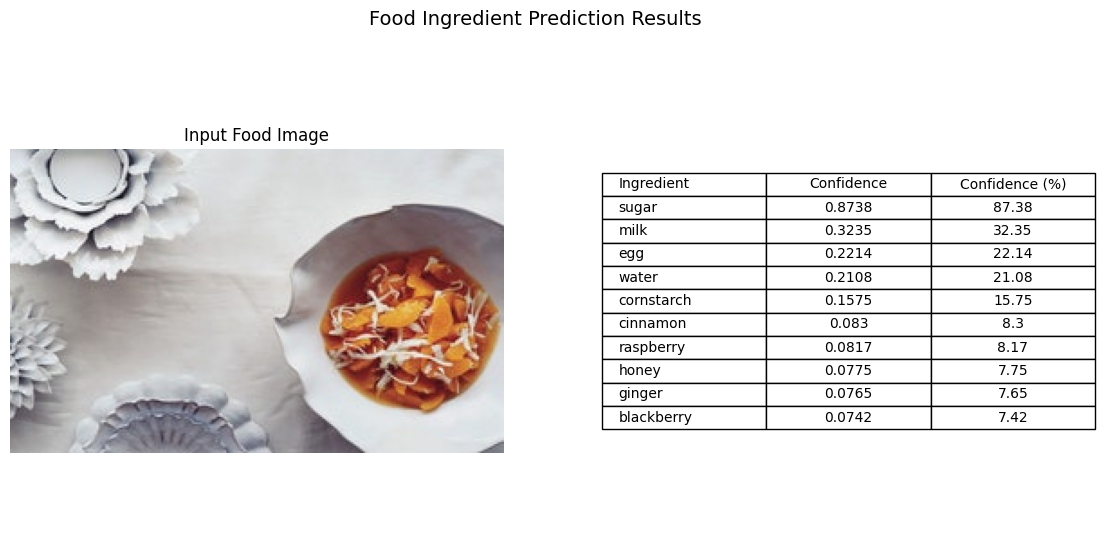

In [8]:
image, preds = predict_ingredients(
    image_path=image_path,
    checkpoint_path=checkpoint_path,
    vocab_path=vocab_path,
    top_k=10,
    min_prob=0.05,
)

# Convert predictions to DataFrame
df = pd.DataFrame(preds, columns=["Ingredient", "Confidence"])

# Format confidence values
df["Confidence"] = df["Confidence"].round(4)
df["Confidence %"] = (df["Confidence"] * 100).round(2)

# Plot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Left: Image only ----
axes[0].imshow(image)
axes[0].axis("off")
axes[0].set_title("Input Food Image", fontsize=12)

# ---- Right: Table with 3 columns ----
axes[1].axis("tight")
axes[1].axis("off")

table_data = df[["Ingredient", "Confidence", "Confidence %"]].values

table = axes[1].table(
    cellText=table_data,
    colLabels=["Ingredient", "Confidence", "Confidence (%)"],
    loc="center",
    cellLoc="left"
)

# Style table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

# Align text properly
for (row, col), cell in table.get_celld().items():
    if col == 0:
        cell.set_text_props(ha="left")
    else:
        cell.set_text_props(ha="center")

plt.suptitle("Food Ingredient Prediction Results", fontsize=14)
plt.show()
